# Import lib


In [1]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

# Read data

In [2]:
# df = pd.read_csv('../data.csv')
df = pd.read_csv('../../data.csv')

/var/folders/v3/t0psjdhs29g8j3cghfdfjd9w0000gn/T/ipykernel_52913/4239913280.py:2: DtypeWarning: Columns (17,45,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../../data.csv')


In [3]:
#check null
null_counts = df.isnull().sum()
print(null_counts)

id                       0
member_id                0
loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
                     ...  
total_rev_hi_lim     67313
inq_fi              842681
total_cu_tl         842681
inq_last_12m        842681
default_ind              0
Length: 73, dtype: int64


# Discover and visualise the data

#### remove irrelevant features

In [4]:
remove_col = [
    'id',
    'member_id',
    'emp_title',
    'issue_d',
    'desc',
    'title',
    'zip_code',
    'addr_state',
    'earliest_cr_line',
    'last_pymnt_d',
    'last_pymnt_amnt',
    'next_pymnt_d',
    'last_credit_pull_d',
    'collections_12_mths_ex_med',
    'mths_since_last_major_derog',
    'policy_code',

    # Vu Anh
    'purpose', 
    'sub_grade',
    'tot_coll_amt', 
    'tot_cur_bal', 
    'open_acc_6m', 
    'open_il_6m', 

    # Darrel
    # 'open_il_12m', 
    # 'open_il_24m', 
    # 'mths_since_rcnt_il', 
    # 'total_bal_il', 
    # 'il_util', 
    # 'open_rv_12m' ,
    # 'open_rv_24m', 

    # Vanness
    'max_bal_bc', 
    'all_util', 
    'total_rev_hi_lim', 
    'inq_fi', 
    'total_cu_tl', 
    'inq_last_12m'
]

In [5]:
df = df.drop(remove_col, axis=1)

In [6]:
np.shape(df)

(855969, 45)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 45 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_amnt                  855969 non-null  int64  
 1   funded_amnt                855969 non-null  int64  
 2   funded_amnt_inv            855969 non-null  float64
 3   term                       855969 non-null  object 
 4   int_rate                   855969 non-null  float64
 5   installment                855969 non-null  float64
 6   grade                      855969 non-null  object 
 7   emp_length                 812908 non-null  object 
 8   home_ownership             855969 non-null  object 
 9   annual_inc                 855969 non-null  float64
 10  verification_status        855969 non-null  object 
 11  pymnt_plan                 855969 non-null  object 
 12  dti                        855969 non-null  float64
 13  delinq_2yrs                85

### Process missing value

In [8]:
# Display all attributes with missing values

null_columns = df.columns[df.isnull().any()] 
null_columns_result = df.isnull().any()[null_columns] 
null_columns_result

emp_length                   True
mths_since_last_delinq       True
mths_since_last_record       True
revol_util                   True
annual_inc_joint             True
dti_joint                    True
verification_status_joint    True
open_il_12m                  True
open_il_24m                  True
mths_since_rcnt_il           True
total_bal_il                 True
il_util                      True
open_rv_12m                  True
open_rv_24m                  True
dtype: bool

#### Emp_length

In [9]:
df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [10]:
label_encoder = LabelEncoder()

# Fit the LabelEncoder with unique values
label_encoder.fit(df['emp_length'].unique())

# Encode the attribute values
df['emp_length'] = label_encoder.transform(df['emp_length'])

In [11]:
df['emp_length'].unique()

array([ 1, 10,  0,  3,  8,  9,  4,  5,  6,  2,  7, 11])

#### mths_since_last_delinq 

In [12]:
df['mths_since_last_delinq'] = df['mths_since_last_delinq'].fillna(-1)

#### mths_since_last_record

In [13]:
df['mths_since_last_record'] = df['mths_since_last_record'].fillna(-1)

#### revol_util

In [14]:
imputer = SimpleImputer(strategy='mean')

revol_util = df['revol_util'].values.reshape(-1,1)

revol_util_imputed = imputer.fit_transform(revol_util)

df['revol_util'] = revol_util_imputed

#### annual_inc_joint

In [15]:
# aggregate annual_inc and annual_inc_joint
df.loc[df['application_type'] == 'JOINT', 'annual_inc'] = df.loc[df['application_type'] == 'JOINT', 'annual_inc_joint']
df = df.drop('annual_inc_joint', axis=1)

#### dti_joint 

In [16]:
df.loc[df['application_type'] == 'JOINT', 'dti'] = df.loc[df['application_type'] == 'JOINT', 'dti_joint']
df = df.drop('dti_joint', axis=1)

#### verification_status_joint 

In [17]:
df.loc[df['application_type'] == 'JOINT', 'verification_status'] = df.loc[df['application_type'] == 'JOINT', 'verification_status_joint']
df = df.drop('verification_status_joint', axis=1)

### Data binning

#### term

In [18]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [19]:
term = [' 36 months', ' 60 months']  # Unique values for encoding

# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Fit the encoder on the grades
encoder.fit(term)

# Encode the 'grade' column in the DataFrame
df['term'] = encoder.transform(df['term'])

### grade

In [20]:
grades = ['A', 'B', 'C', 'D', 'E', 'F', 'G']  # Unique values for encoding

encoder = LabelEncoder()

encoder.fit(grades)

df['grade'] = encoder.transform(df['grade'])

### verification_status

In [21]:
veri = ['Not Verified', 'Source Verified', 'Verified']  # Unique values for encoding

encoder = LabelEncoder()

encoder.fit(veri)


df['verification_status'] = encoder.transform(df['verification_status'])

### pymnt_plan

In [22]:
plan = ['n', 'y']  # Unique values for encoding

encoder = LabelEncoder()

encoder.fit(plan)

df['pymnt_plan'] = encoder.transform(df['pymnt_plan'])

### application_type

In [23]:
type = ['INDIVIDUAL', 'JOINT'] # Unique values for encoding

encoder = LabelEncoder()

encoder.fit(type)

df['application_type'] = encoder.transform(df['application_type'])

#### initial_list_status

In [24]:

status = ['f', 'w'] # Unique values for encoding

encoder = LabelEncoder()

encoder.fit(status)

df['initial_list_status'] = encoder.transform(df['initial_list_status'])

### Cleaning of the following

    'open_il_12m', 842681 missing values, can consider scrapping as there's no value
    'open_il_24m', 842681 missing values, can consider scrapping as there's no value
    'mths_since_rcnt_il', 843035 missing values, while there's alot of missing values however, those recorded >1 months since most recent instalment account opened will 100% not default
    'total_bal_il', 842681 missing values, while there's alot of missing values however, those recorded >0 total current balance of all instalment account will 100% not default
    'il_util', 844360 missing values, 
    'open_rv_12m' , 842681 missing values, 
    'open_rv_24m', 842681 missing values, 

 'open_il_24m' & 'open_il_24m'

In [25]:
#check null
null_counts = df.isnull().sum()
print(null_counts)

loan_amnt                       0
funded_amnt                     0
funded_amnt_inv                 0
term                            0
int_rate                        0
installment                     0
grade                           0
emp_length                      0
home_ownership                  0
annual_inc                      0
verification_status             0
pymnt_plan                      0
dti                             0
delinq_2yrs                     0
inq_last_6mths                  0
mths_since_last_delinq          0
mths_since_last_record          0
open_acc                        0
pub_rec                         0
revol_bal                       0
revol_util                      0
total_acc                       0
initial_list_status             0
out_prncp                       0
out_prncp_inv                   0
total_pymnt                     0
total_pymnt_inv                 0
total_rec_prncp                 0
total_rec_int                   0
total_rec_late

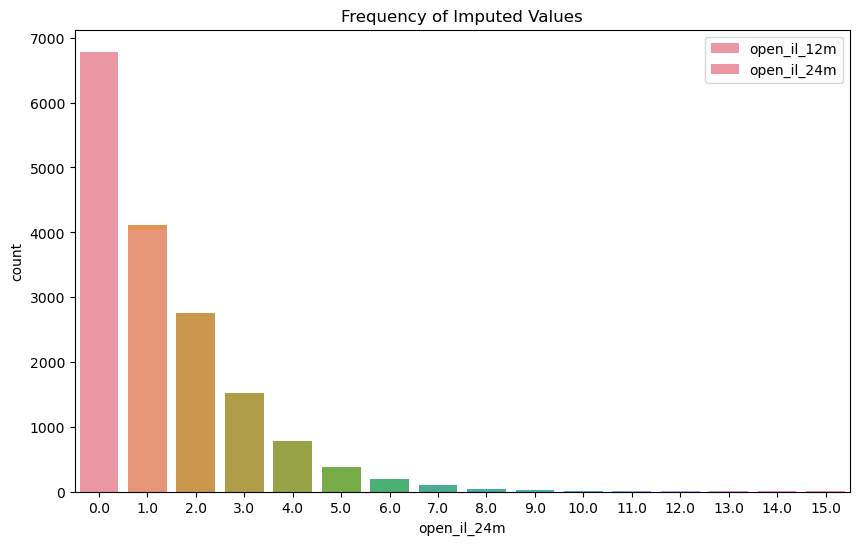

In [26]:
# Before Inputation
columns_to_visualize = ['open_il_12m', 'open_il_24m']

# Plotting settings
plt.figure(figsize=(10, 6))
plt.title("Frequency of Imputed Values")
plt.xlabel("Counts")
plt.ylabel("Frequency")

# Create count plots for each column
for column in columns_to_visualize:
    sns.countplot(data=df, x=column)
    
plt.legend(columns_to_visualize)
plt.show()

In [27]:
df['open_il_12m'].unique()
df[['open_il_12m', 'open_il_24m']].describe()


,open_il_12m,open_il_24m
count,13288.000000,13288.000000
mean,0.749323,1.666767
std,0.986169,1.685394
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,1.000000,2.000000
max,12.000000,15.000000


In [28]:
# Inpute with 0

columns_to_impute = ['open_il_12m', 'open_il_24m']

# Impute missing values with 0
df[columns_to_impute] = df[columns_to_impute].fillna(0)


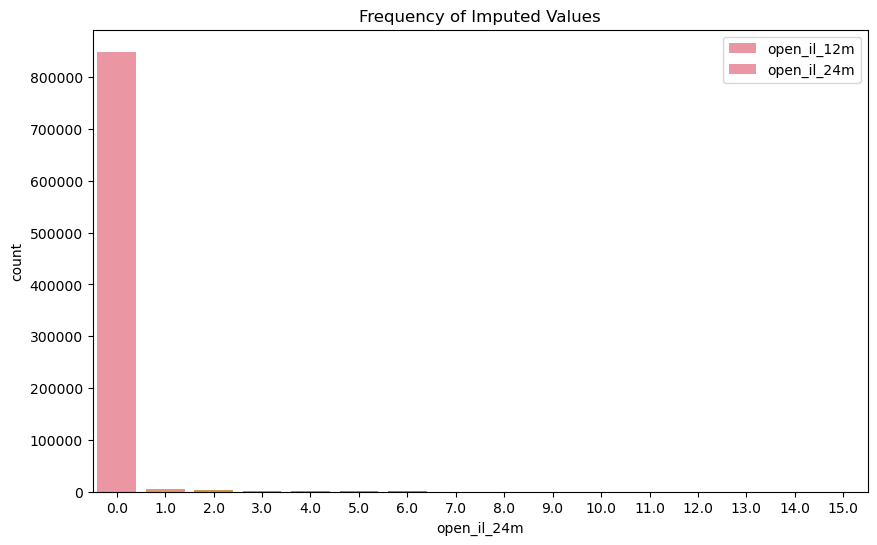

In [29]:
# After Inputation
columns_to_visualize = ['open_il_12m', 'open_il_24m']

# Plotting settings
plt.figure(figsize=(10, 6))
plt.title("Frequency of Imputed Values")
plt.xlabel("Counts")
plt.ylabel("Frequency")

# Create count plots for each column
for column in columns_to_visualize:
    sns.countplot(data=df, x=column)
    
plt.legend(columns_to_visualize)
plt.show()

'mths_since_rcnt_il'

In [30]:
df['mths_since_rcnt_il'].unique()

array([ nan,  28.,   2.,  45.,  12.,   3.,   5.,  19.,   6.,  82.,  25.,
         7.,  56.,  20.,   9.,  14.,  29.,  47.,  10., 148.,  67., 150.,
        11.,   8.,   1.,  87.,   4.,  81.,  18.,  44.,  32., 147.,  26.,
        17., 113.,  63.,  24.,  15.,  33.,  22.,  27.,  69.,  23.,  40.,
        57.,  52.,  97.,  38.,  16.,  13.,  72.,  46.,  35.,  39.,  31.,
       124.,  36.,  68.,  50.,  37.,  60.,  49., 127.,  65.,  92.,  21.,
        30.,   0.,  41., 107.,  48., 174., 101., 129., 119.,  58., 123.,
       137.,  91.,  90.,  55., 110., 117.,  54.,  51., 134.,  94., 120.,
       105., 111., 164.,  75., 122., 139.,  64.,  96.,  34.,  86., 156.,
        61.,  93., 116.,  95.,  43., 158.,  70., 121., 112.,  53.,  42.,
        59., 141.,  78.,  98.,  83.,  66., 103., 100., 135., 130., 125.,
       108., 226., 185., 109., 136.,  80., 300., 126., 131., 167.,  89.,
        76.,  71.,  85.,  74., 175., 102.,  79., 162.,  99.,  84., 104.,
       144.,  77., 118.,  62., 115., 114., 128., 20

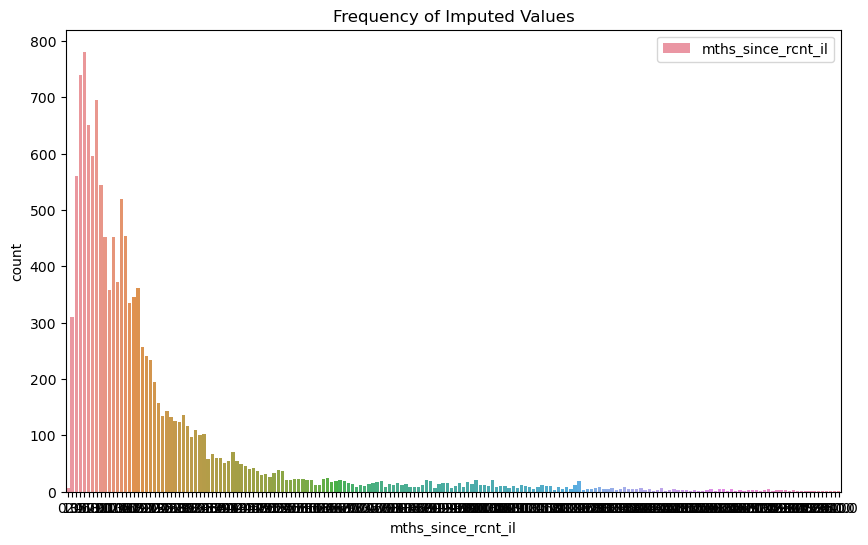

In [31]:
# Before Inputation
columns_to_visualize = ['mths_since_rcnt_il']

# Plotting settings
plt.figure(figsize=(10, 6))
plt.title("Frequency of Imputed Values")
plt.xlabel("Counts")
plt.ylabel("Frequency")

# Create count plots for each column
for column in columns_to_visualize:
    sns.countplot(data=df, x=column)
    
plt.legend(columns_to_visualize)
plt.show()

In [32]:
# Check against default_ind
condition = (df['mths_since_rcnt_il'] > 0) & (df['default_ind'] == 1)
result_df = df[condition]

result_df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,application_type,acc_now_delinq,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,default_ind


In [33]:
# Inpute with 0

columns_to_impute = ['mths_since_rcnt_il']


# Impute missing values with 0
df[columns_to_impute] = df[columns_to_impute].fillna(0)

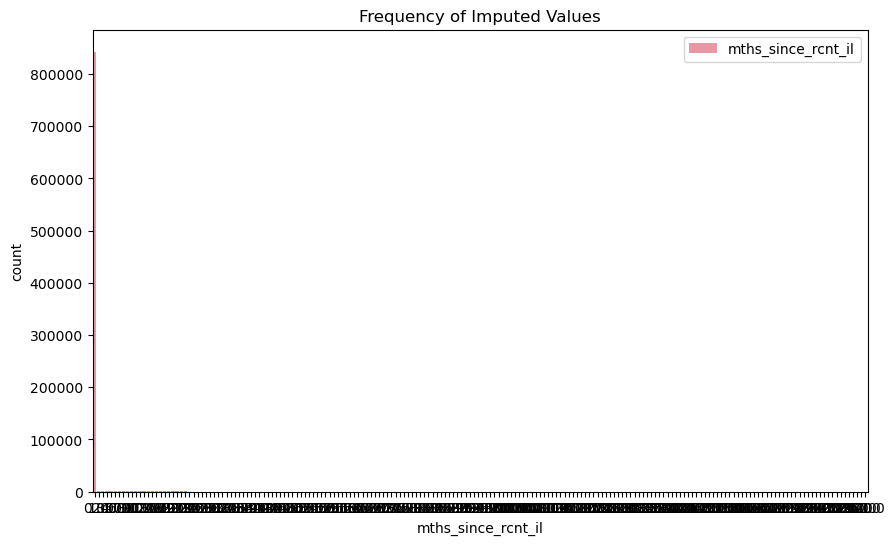

In [34]:
# After Inputation
columns_to_visualize = ['mths_since_rcnt_il']

# Plotting settings
plt.figure(figsize=(10, 6))
plt.title("Frequency of Imputed Values")
plt.xlabel("Counts")
plt.ylabel("Frequency")

# Create count plots for each column
for column in columns_to_visualize:
    sns.countplot(data=df, x=column)
    
plt.legend(columns_to_visualize)
plt.show()

total_bal_il

In [35]:
filtered_df = df.dropna(subset=['total_bal_il'])
total_bal_il_values = filtered_df['total_bal_il'].unique()

# Display unique values and the rest of the columns
filtered_df


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,application_type,acc_now_delinq,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,default_ind
452272,25000,25000,25000.0,0,5.32,752.87,0,0,MORTGAGE,150000.0,...,0,0,0.0,0.0,28.0,25447.0,5.6,1.0,1.0,0
452273,18000,18000,18000.0,1,19.48,471.70,4,7,RENT,150000.0,...,0,0,1.0,3.0,2.0,22195.0,70.9,2.0,4.0,0
452274,7000,7000,7000.0,0,7.49,217.72,0,1,MORTGAGE,59000.0,...,0,0,0.0,0.0,45.0,5337.0,26.2,1.0,2.0,0
452275,20000,20000,20000.0,0,17.97,722.75,3,7,MORTGAGE,180000.0,...,0,0,1.0,1.0,12.0,72335.0,88.2,2.0,3.0,0
452276,15000,15000,15000.0,0,6.99,463.09,0,2,MORTGAGE,93000.0,...,0,0,1.0,1.0,2.0,50591.0,40.8,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466902,15000,15000,15000.0,0,7.26,464.95,0,11,MORTGAGE,60000.0,...,0,0,1.0,1.0,12.0,19216.0,74.1,1.0,1.0,0
466936,21000,21000,21000.0,0,9.76,675.25,1,3,OWN,103000.0,...,0,0,1.0,2.0,3.0,43021.0,89.3,1.0,1.0,0
466945,8000,8000,8000.0,0,12.59,267.98,2,0,OWN,215000.0,...,0,0,2.0,3.0,5.0,154224.0,99.7,3.0,3.0,0
466960,35000,35000,35000.0,0,13.67,1190.62,2,1,MORTGAGE,225000.0,...,0,0,0.0,0.0,76.0,0.0,NaN,2.0,2.0,0


In [36]:
# Check against default_ind
condition = (df['total_bal_il'] > 0) & (df['default_ind'] == 1)
result_df = df[condition]

result_df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,application_type,acc_now_delinq,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,default_ind


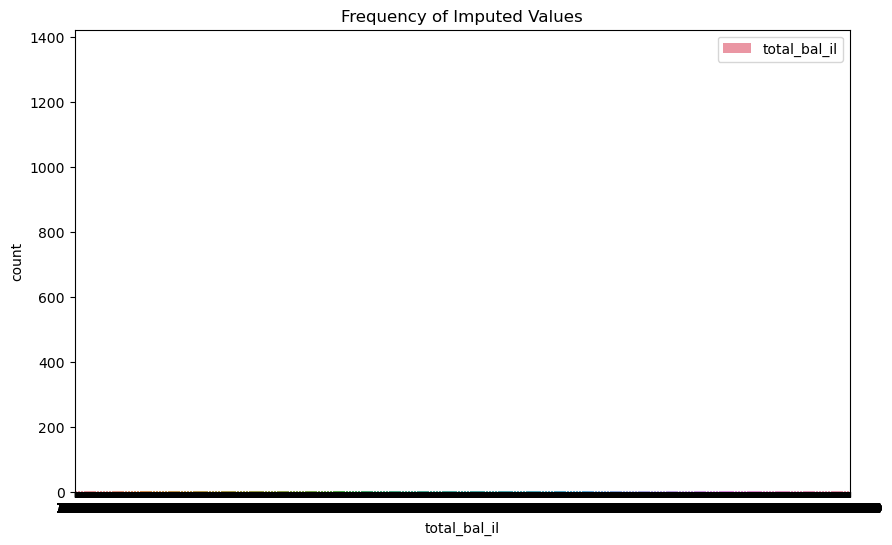

In [37]:
# Before Inputation
columns_to_visualize = ['total_bal_il']

# Plotting settings
plt.figure(figsize=(10, 6))
plt.title("Frequency of Imputed Values")
plt.xlabel("Counts")
plt.ylabel("Frequency")

# Create count plots for each column
for column in columns_to_visualize:
    sns.countplot(data=df, x=column)
    
plt.legend(columns_to_visualize)
plt.show()

In [38]:
# Inpute with 0

columns_to_impute = ['total_bal_il']


# Impute missing values with 0
df[columns_to_impute] = df[columns_to_impute].fillna(0)

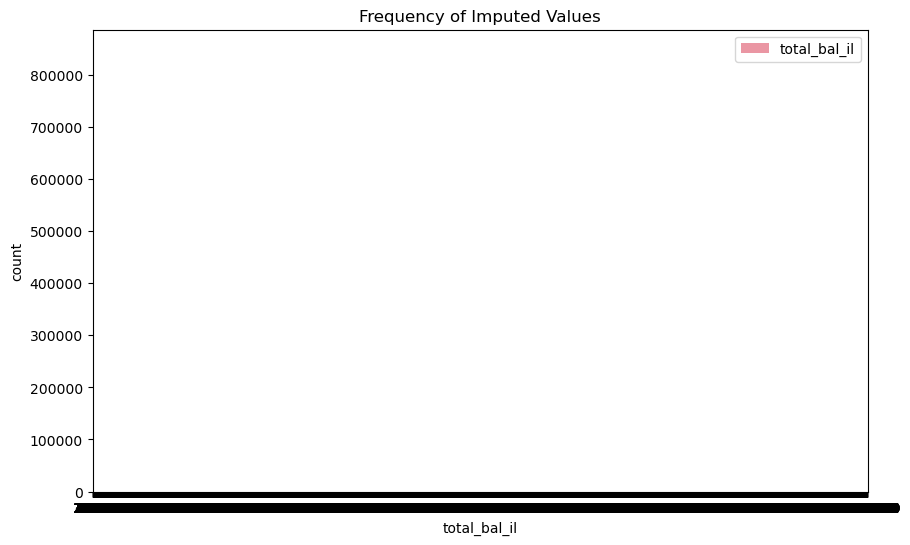

In [39]:
# After Inputation
columns_to_visualize = ['total_bal_il']

# Plotting settings
plt.figure(figsize=(10, 6))
plt.title("Frequency of Imputed Values")
plt.xlabel("Counts")
plt.ylabel("Frequency")

# Create count plots for each column
for column in columns_to_visualize:
    sns.countplot(data=df, x=column)
    
plt.legend(columns_to_visualize)
plt.show()

il_util

In [40]:
filtered_df = df.dropna(subset=['il_util'])
total_bal_il_values = filtered_df['il_util'].unique()

# Display unique values and the rest of the columns
filtered_df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,application_type,acc_now_delinq,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,default_ind
452272,25000,25000,25000.0,0,5.32,752.87,0,0,MORTGAGE,150000.0,...,0,0,0.0,0.0,28.0,25447.0,5.6,1.0,1.0,0
452273,18000,18000,18000.0,1,19.48,471.70,4,7,RENT,150000.0,...,0,0,1.0,3.0,2.0,22195.0,70.9,2.0,4.0,0
452274,7000,7000,7000.0,0,7.49,217.72,0,1,MORTGAGE,59000.0,...,0,0,0.0,0.0,45.0,5337.0,26.2,1.0,2.0,0
452275,20000,20000,20000.0,0,17.97,722.75,3,7,MORTGAGE,180000.0,...,0,0,1.0,1.0,12.0,72335.0,88.2,2.0,3.0,0
452276,15000,15000,15000.0,0,6.99,463.09,0,2,MORTGAGE,93000.0,...,0,0,1.0,1.0,2.0,50591.0,40.8,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466892,7700,7700,7700.0,0,13.67,261.94,2,1,OWN,88000.0,...,0,0,1.0,3.0,4.0,204261.0,95.2,0.0,0.0,0
466902,15000,15000,15000.0,0,7.26,464.95,0,11,MORTGAGE,60000.0,...,0,0,1.0,1.0,12.0,19216.0,74.1,1.0,1.0,0
466936,21000,21000,21000.0,0,9.76,675.25,1,3,OWN,103000.0,...,0,0,1.0,2.0,3.0,43021.0,89.3,1.0,1.0,0
466945,8000,8000,8000.0,0,12.59,267.98,2,0,OWN,215000.0,...,0,0,2.0,3.0,5.0,154224.0,99.7,3.0,3.0,0


In [41]:
df['il_util'].unique()

array([  nan,   5.6,  70.9, ...,  12.9, 116.9,   6.3])

In [42]:
# Check against default_ind
condition = (df['il_util'] > 0) & (df['default_ind'] == 1)
result_df = df[condition]

result_df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,application_type,acc_now_delinq,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,default_ind


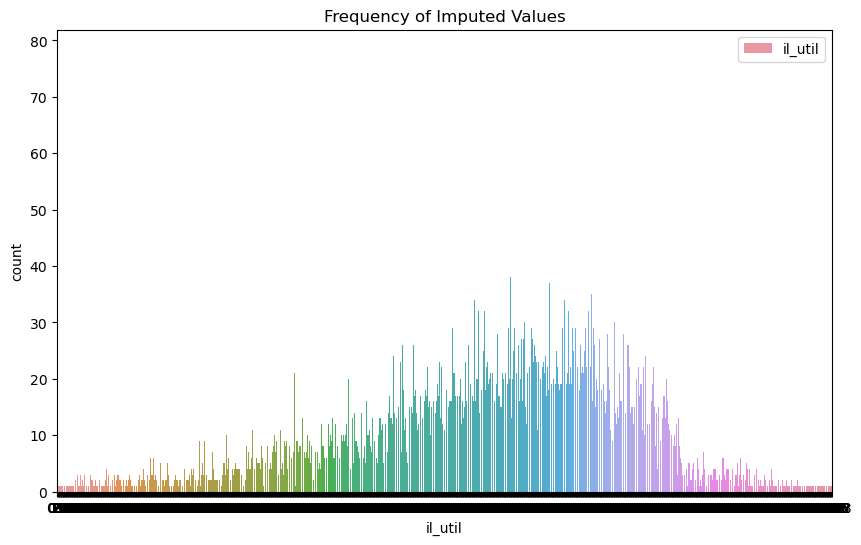

In [43]:
# Before Inputation
columns_to_visualize = ['il_util']

# Plotting settings
plt.figure(figsize=(10, 6))
plt.title("Frequency of Imputed Values")
plt.xlabel("Counts")
plt.ylabel("Frequency")

# Create count plots for each column
for column in columns_to_visualize:
    sns.countplot(data=df, x=column)
    
plt.legend(columns_to_visualize)
plt.show()

In [44]:
# Inpute with 0

columns_to_impute = ['il_util']


# Impute missing values with 0
df[columns_to_impute] = df[columns_to_impute].fillna(0)

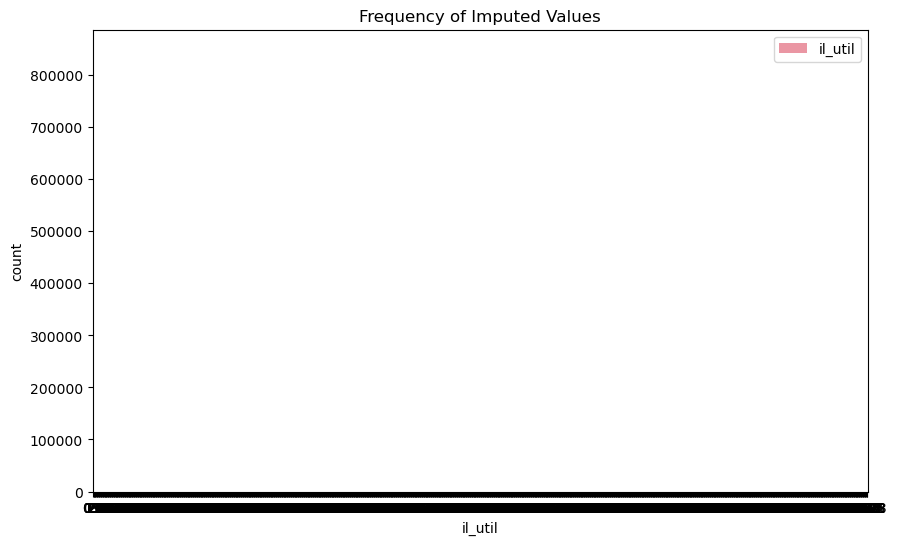

In [45]:
# After Inputation
columns_to_visualize = ['il_util']

# Plotting settings
plt.figure(figsize=(10, 6))
plt.title("Frequency of Imputed Values")
plt.xlabel("Counts")
plt.ylabel("Frequency")

# Create count plots for each column
for column in columns_to_visualize:
    sns.countplot(data=df, x=column)
    
plt.legend(columns_to_visualize)
plt.show()

open_rv_12m, open_rv_24m

In [46]:
df[['open_rv_12m', 'open_rv_24m']].describe()

,open_rv_12m,open_rv_24m
count,13288.000000,13288.000000
mean,1.354305,2.945515
std,1.483710,2.595313
min,0.000000,0.000000
25%,0.000000,1.000000
50%,1.000000,2.000000
75%,2.000000,4.000000
max,22.000000,43.000000


In [47]:
# Inpute with 0

columns_to_impute = ['open_rv_12m', 'open_rv_24m']

# Impute missing values with 0
df[columns_to_impute] = df[columns_to_impute].fillna(0)

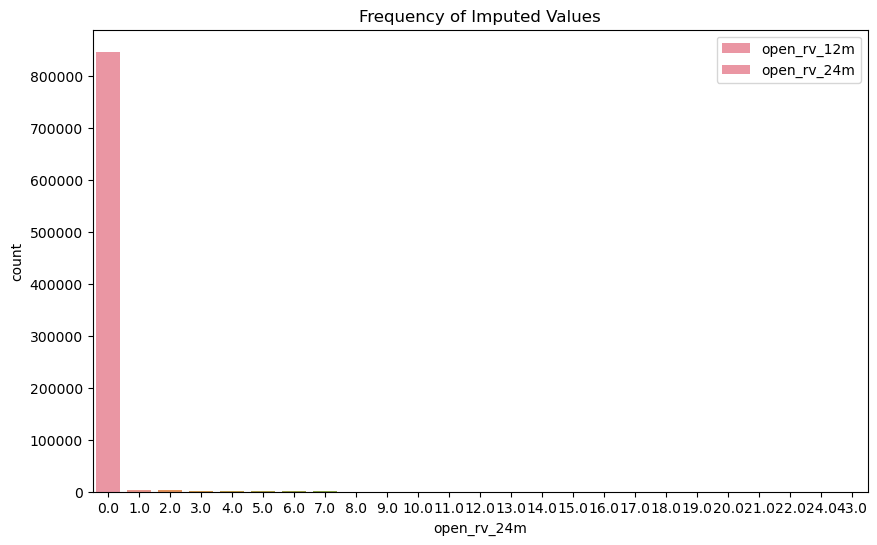

In [48]:
columns_to_visualize = ['open_rv_12m', 'open_rv_24m']

# Plotting settings
plt.figure(figsize=(10, 6))
plt.title("Frequency of Imputed Values")
plt.xlabel("Counts")
plt.ylabel("Frequency")

# Create count plots for each column
for column in columns_to_visualize:
    sns.countplot(data=df, x=column)
    
plt.legend(columns_to_visualize)
plt.show()

### Generate new feature

In [49]:
# Generate the new feature
df['open_acc_rate'] = df['open_acc'] / df['total_acc']
# Swap the values and column names
df['open_acc_rate'], df['default_ind'] = df['default_ind'].copy(), df['open_acc_rate'].copy()
df.rename(columns={'open_acc_rate': 'default_ind', 'default_ind': 'open_acc_rate'}, inplace=True)

In [50]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,acc_now_delinq,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,open_acc_rate,default_ind
0,5000,5000,4975.0,0,10.65,162.87,1,1,RENT,24000.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0
1,2500,2500,2500.0,1,15.27,59.83,2,10,RENT,30000.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.750000,1
2,2400,2400,2400.0,0,15.96,84.33,2,1,RENT,12252.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.200000,0
3,10000,10000,10000.0,0,13.49,339.31,2,1,RENT,49200.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.270270,0
4,3000,3000,3000.0,1,12.69,67.79,1,0,RENT,80000.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.394737,0


In [51]:
np.shape(df)

(855969, 43)

### Visualize

In [52]:
# Create a correlation matrix
corr_matrix = df.corr()

# Select the correlation values with 'default_ind'
target_corr = corr_matrix['default_ind']

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

ValueError: could not convert string to float: 'RENT'

### Attribute ranking

In [ ]:
# Take the absolute values of the correlation
abs_corr = target_corr.abs()

# Sort the absolute correlation values
sorted_corr = abs_corr.sort_values(ascending=False)

# Display the attribute ranking
attribute_ranking = sorted_corr.reset_index()
attribute_ranking.columns = ['Attribute', 'Absolute Correlation']
attribute_ranking